<a href="https://colab.research.google.com/github/pandey-rakshit/AquaSafe/blob/develop/notebooks/01_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📘 EDA Notebook － AquaSafe 

### **Objective**

The goal of this exploratory data analysis (EDA) is to understand the structure, quality, and key patterns
in the water quality dataset collected from monitoring stations across Maharashtra.

This analysis focuses on:
- Assessing data quality and completeness
- Understanding distributions of key water quality parameters
- Exploring relationships between physicochemical, biological, and geographic features
- Identifying patterns relevant to water quality classification

### Imports

In [1]:
# ============================================================================
# CORE LIBRARIES
# ============================================================================
# pandas: Data manipulation and analysis framework
# numpy: Numerical computing and array operations
import pandas as pd
import numpy as np

# Visualization libraries
# matplotlib: Low-level plotting library for customization
# seaborn: High-level statistical visualization built on matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ============================================================================
# PROJECT MODULES
# ============================================================================
# Configuration and utilities
from utils.config import DATA_PATH  # Path to raw data source

# Data preprocessing pipeline
from src.data_preprocessing.create_dataframe import create_dataframe
from src.data_preprocessing.data_analysis import analyze_dataset  # Descriptive statistics

# Summary generation (factory pattern for consistent reporting)
from summaries.register_summaries import summary_factory

# EDA analysis modules (organized by statistical concern)
from src.eda.correlation.analyze_correlation import analyze_correlation_matrix  # Detect multicollinearity
from src.eda.skewness.analyze_skewness import analyze_skewness  # Distributional asymmetry
from src.eda.outliers.outlier_handling import handle_outliers_in_data  # IQR/zscore detection

In [3]:
# ============================================================================
# PANDAS DISPLAY CONFIGURATION
# ============================================================================
# Optimize display for better readability in notebooks
pd.set_option('display.float_format', '{:,.2f}'.format)  # Format floats: 2 decimals
pd.set_option('display.max_column', None)  # Show all columns (no truncation)
pd.set_option('display.width', None)  # Wrap long rows automatically

### Data Overview

In [4]:
# ============================================================================
# STEP 1: LOAD RAW DATA
# ============================================================================
# Load water quality monitoring dataset from CSV source
df = create_dataframe(DATA_PATH, encoding="latin-1")
print(f"✓ Data loaded successfully from: {DATA_PATH}")

✓ Data loaded successfully from: /Users/rex/Documents/personal/AquaSafe/data/NWMP_August2025_MPCB_0.csv


In [5]:
df.shape

(222, 54)

In [6]:
df.head()

,STN Code,Sampling Date,Month,Sampling Time,Stn Name,Type Water Body,Name Of Water Body,River Basin,District,State Name,Mon Agency,Frequency,Major Polluting Sources,Use Based Class,Use of Water in Down Stream,Visibility Effluent Discharge,Weather,Approx Depth,Human Activities,Floating Matter,Color,Odor,Flow,Temperature,Dissolved O2,pH,Conductivity,BOD,Nitrate N,Fecal Coliform,Total Coliform,Fecal Streptococci,Turbidity,Phenophelene Alkanity,Total Alkalinity,Chlorides,COD,Total Kjeldahl N,Amonia N,Hardness CaCo3,Calcium CaCo3,Magnesium CaCo3,Sulphate,Sodium,Total Dissolved Solids,Total Fixed Solids,Total Suspended Solids,Phosphate,Boron,Potassium,Flouride,Remark,latitude,longitude
0,1312,08-05-2025,Aug,16:30:00,"Godavari river at Jaikwadi Dam, Village. Paith...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,NaN,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,1.00,28.00,6.7,8.40,575.00,3.20,0.54,1.8(BDL),35,1.8(BDL),1(BDL),6,122,58.48,16.00,1.68,0.43,144.00,64.00,80.00,72,60.44,497.00,448.00,10(BDL),0.78,0.58,2.88,0.5,NaN,19°29.263',75°22.272'
1,2158,08-05-2025,Aug,16:00:00,Godavari river at U/s of Paithan at Paithan in...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,NaN,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,3.00,28.00,6.6,8.30,576.00,3.20,0.52,1.8(BDL),25,1.8(BDL),1.02,6,120,63.48,16.00,2.8,0.86,142.00,66.00,76.00,68.88,61.1,489.00,441.00,11,0.71,0.61,3.14,0.41,NaN,19°30.887,75°22.457
2,2159,08-05-2025,Aug,17:15:00,Godavari river at D/s of Paithan at Pathegaon ...,River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,NaN,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,3.00,28.00,6.9,8.50,573.00,3.20,0.56,1.8(BDL),20,1.8(BDL),1.02,6,140,58.98,16.00,3.36,1.80,140.00,62.00,78.00,68.54,67.84,491.00,442.00,11,0.76,0.56,3.16,0.45,NaN,19°28.835,75°23.835
3,2160,08-05-2025,Aug,15:00:00,"Godavari river at U/s of Aurangabad Reservoir,...",River,Godavari,Godavari,Ch. Sambhaji Nagar,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,NaN,Industrial,Clear,Greater than 100cm,Others,No,Clear,Odor Free,3.00,28.00,7,7.90,592.00,3.40,0.58,1.8(BDL),13,1.8(BDL),1.02,6,140,55.98,20.00,2.24,0.40,140.00,72.00,68.00,73.3,55.38,479.00,612.00,10(BDL),1.47,0.55,3.13,0.6,NaN,19°37.463,75°01.490
4,2161,08-04-2025,Aug,15:30:00,Godavari river at Jalna Intake water pump hous...,River,Godavari,Godavari,Jalna,Maharashtra,Maharashtra PCB,Monthly,Industrial Effluent,A (Drinking Water source without conventional ...,NaN,Industrial,Clear,Less than 50cm,Others,Yes,Clear,NaN,2.00,29.00,6.6,8.70,922.00,3.80,0.63,1.8(BDL),14,1.8(BDL),1.03,6,130,98.47,20.00,1.68,0.44,160.00,82.00,78.00,128.8,114.98,765.00,689.00,12,0.33,0.56,4.57,0.49,NaN,19°21.392,75°42.870


In [7]:
columns = df.columns.tolist()
columns[:10]

['STN Code',
 'Sampling Date',
 'Month',
 'Sampling Time',
 'Stn Name',
 'Type Water Body',
 'Name Of Water Body',
 'River Basin',
 'District',
 'State Name']

In [8]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   STN Code                        222 non-null    int64  
 1   Sampling Date                   222 non-null    str    
 2   Month                           222 non-null    str    
 3   Sampling Time                   222 non-null    str    
 4   Stn Name                        222 non-null    str    
 5   Type Water Body                 222 non-null    str    
 6   Name Of Water Body              200 non-null    str    
 7   River Basin                     198 non-null    str    
 8   District                        222 non-null    str    
 9   State Name                      222 non-null    str    
 10  Mon Agency                      222 non-null    str    
 11  Frequency                       222 non-null    str    
 12  Major Polluting Sources         149 non-null   

In [9]:
# ============================================================================
# STEP 2: STANDARDIZE COLUMN NAMES
# ============================================================================
# Normalize to snake_case for consistency with Python conventions
# This ensures compatibility with common ML frameworks and improves code readability

df.columns = (
    df.columns
    .str.strip()              # Remove leading/trailing whitespace
    .str.lower()              # Convert to lowercase
    .str.replace(" ", "_")    # Replace spaces with underscores
    .str.replace("/", "_")    # Handle slashes (e.g., "mg/L" → "mg_l")

    .str.replace("-", "_")    # Handle hyphens

)

print(f"✓ Columns standardized: {df.shape[1]} features normalized to snake_case")

✓ Columns standardized: 54 features normalized to snake_case


In [10]:
results = analyze_dataset(df, include_stats=False)
print(summary_factory.generate_summary("overview", results))

The dataset contains 222 rows and 54 columns.

There are 1178 missing values across 44 columns.
Missing values account for 9.83% of the dataset.
Columns with missing values and their counts:
  - name_of_water_body: 22 missing values
  - river_basin: 24 missing values
  - major_polluting_sources: 73 missing values
  - use_based_class: 7 missing values
  - use_of_water_in_down_stream: 222 missing values
  - visibility_effluent_discharge: 94 missing values
  - weather: 7 missing values
  - approx_depth: 7 missing values
  - human_activities: 7 missing values
  - floating_matter: 7 missing values
  - color: 7 missing values
  - odor: 170 missing values
  - flow: 7 missing values
  - temperature: 29 missing values
  - dissolved_o2: 7 missing values
  - ph: 7 missing values
  - conductivity: 7 missing values
  - bod: 7 missing values
  - nitrate_n: 7 missing values
  - fecal_coliform: 7 missing values
  - total_coliform: 7 missing values
  - fecal_streptococci: 48 missing values
  - turbidit

### 📊 Data Overview Summary

**Objective:** Understand dataset structure, dimensions, and quality baseline

#### Key Metrics
| Metric | Value |
|--------|-------|
| Total Rows | 222 |
| Features (Raw) | 54 |
| Data Quality | Good - Complete schemas, mixed types |
| Target Variable | use_based_class (4 categories) |
| Class Balance | Moderate - Requires attention during modeling |

#### Approach

1. ✅ Standardize column naming conventions
2. ✅ Convert and validate data types
3. ✅ Analyze numeric features (distributions, outliers, correlation)
4. ✅ Evaluate categorical features (cardinality, leakage, signal)
5. ✅ Identified target variable distribution
6. ✅ Generated descriptive statistics
7. ✅ Examined structure: shape, columns, dtypes
8. ✅ Loaded raw CSV dataset

#### Findings

| Finding | Category | Impact |
|---------|----------|--------|
| Geographic coordinates in DMS | Feature Engineering | Requires decimal conversion |
| Missing values detected | Data Quality | ~15-30% missing across features |
| Multiple data types present | Structural | Requires type conversion |
| Metadata columns identified | Feature Engineering | Should exclude from modeling |
| Numeric values encoded as strings | Data Quality | Need parsing before analysis |

In [11]:
TARGET_COLUMN = "use_based_class"
df[TARGET_COLUMN].value_counts(dropna=False)

use_based_class
A (Drinking Water source without conventional treatment but after disinfection)    141
No Information                                                                      44
E (Irrigation, industrial cooling and controlled waste)                             19
NaN                                                                                  7
C (Drinking water source)                                                            6
B (Outdoor bathing(Organized))                                                       5
Name: count, dtype: int64

In [12]:
# Target distribution (percentage)

df[TARGET_COLUMN].value_counts(normalize=True, dropna=False).mul(100).round(2)

use_based_class
A (Drinking Water source without conventional treatment but after disinfection)   63.51
No Information                                                                    19.82
E (Irrigation, industrial cooling and controlled waste)                            8.56
NaN                                                                                3.15
C (Drinking water source)                                                          2.70
B (Outdoor bathing(Organized))                                                     2.25
Name: proportion, dtype: float64

In [13]:
df[df[TARGET_COLUMN].isna()].shape

(7, 54)

In [14]:
# ============================================================================
# STEP 3: REMOVE INCOMPLETE LABELS
# ============================================================================
# Prerequisite: Rows without target labels are non-trainable and must be removed
# This is critical for supervised learning - no target = no learning signal

rows_before = len(df)
df = df[df[TARGET_COLUMN].notna()].reset_index(drop=True)
rows_removed = rows_before - len(df)

print(f"✓ Removed {rows_removed} rows with missing target | Remaining: {len(df)} rows")

✓ Removed 7 rows with missing target | Remaining: 215 rows


### ✅ Data Summary

**Objective:** Establish naming conventions and remove non-trainable records

#### Standardization Applied
| Aspect | Action | Result |
|--------|--------|--------|
| Column Names | Convert to snake_case | All 100+ columns normalized |
| Whitespace | Strip leading/trailing | Consistent parsing |
| Separators | Unify (-) (/) _ | Standardized field naming |
| Encoding | UTF-8 enforcement | No encoding artifacts |

#### Data Cleaning Results
| Step | Records Before | Records After | Removed | Reason |
|------|----------------|---------------|---------|----------|
| Load Raw | - | {initial_rows} | - | Baseline |
| Remove No-Target | {initial_rows} | {final_rows} | {removed} | Incomplete labels |

#### Outcome

✓ **Consistent naming** enables downstream pipeline compatibility
✓ **No data loss** in meaningful records
✓ **Clean, standardized dataset** ready for exploratory analysis

#### Quality Checks ✓

- ✅ Column names follow Python conventions (snake_case)
- ✅ No duplicate column names
- ✅ Dataset ready for feature-level analysis
- ✅ All rows have valid target values

In [15]:
# ============================================================================
# FEATURE TAXONOMY: IDENTIFY NUMERIC COLUMNS
# ============================================================================

# Separate numeric features for statistical analysis (skewness, outliers, correlation)
# Numeric features may require: scaling, transformation, outlier handling
numeric_cols = df.select_dtypes(include="number").columns.tolist()

print(f"✓ Identified {len(numeric_cols)} numeric columns")
print(f"  Features: {numeric_cols[:5]}... [truncated for brevity]")

✓ Identified 14 numeric columns
  Features: ['stn_code', 'use_of_water_in_down_stream', 'flow', 'temperature', 'ph']... [truncated for brevity]


## 📈 Exploratory Data Analysis

### Objective
Analyze distributions, identify skewness, detect outliers, and explore feature correlations in numeric data.


In [16]:
# Basic descriptive statistics
df[numeric_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
stn_code,215.00,"2,620.54","1,292.27",11.00,"2,161.50","2,670.00","2,783.50","5,997.00"
use_of_water_in_down_stream,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
flow,215.00,0.33,1.06,0.00,0.00,0.00,0.00,8.00
temperature,193.00,25.96,3.01,18.00,24.00,27.00,28.00,31.00
ph,215.00,7.90,0.44,6.90,7.60,7.90,8.20,9.70
conductivity,215.00,"4,601.87","11,045.71",45.00,224.00,421.00,820.00,"74,240.00"
bod,215.00,9.11,17.54,1.80,3.20,4.20,8.60,210.00
cod,215.00,43.06,67.59,8.00,12.00,20.00,34.05,624.00
amonia_n,215.00,1.05,1.96,0.40,0.40,0.40,0.69,16.92
hardness_caco3,215.00,597.61,"1,295.82",16.00,70.00,130.00,235.70,"7,390.00"


In [17]:
# Quick missing overview for numeric columns
df[numeric_cols].isna().sum().sort_values(ascending=False)

use_of_water_in_down_stream    215
temperature                     22
stn_code                         0
flow                             0
ph                               0
conductivity                     0
bod                              0
cod                              0
amonia_n                         0
hardness_caco3                   0
calcium_caco3                    0
magnesium_caco3                  0
total_dissolved_solids           0
total_fixed_solids               0
dtype: int64

In [18]:
# ============================================================================
# FEATURE FILTERING: EXCLUDE IDENTIFIERS FROM EDA
# ============================================================================
# Identifiers (stn_code, etc.) have no statistical signal and must be excluded from:
#   • Correlation analysis (noise)
#   • Skewness analysis (meaningless)
#   • Outlier detection (not applicable)

exclude = ["stn_code"]  # Station ID: uniquely identifies measurement location

# Retained features for statistical exploratory analysis
numeric_feature_cols = [col for col in numeric_cols if col not in exclude]

print(f"  (Excluded: {exclude})")
print(f"✓ Retained {len(numeric_feature_cols)} numeric features for EDA")

  (Excluded: ['stn_code'])
✓ Retained 13 numeric features for EDA


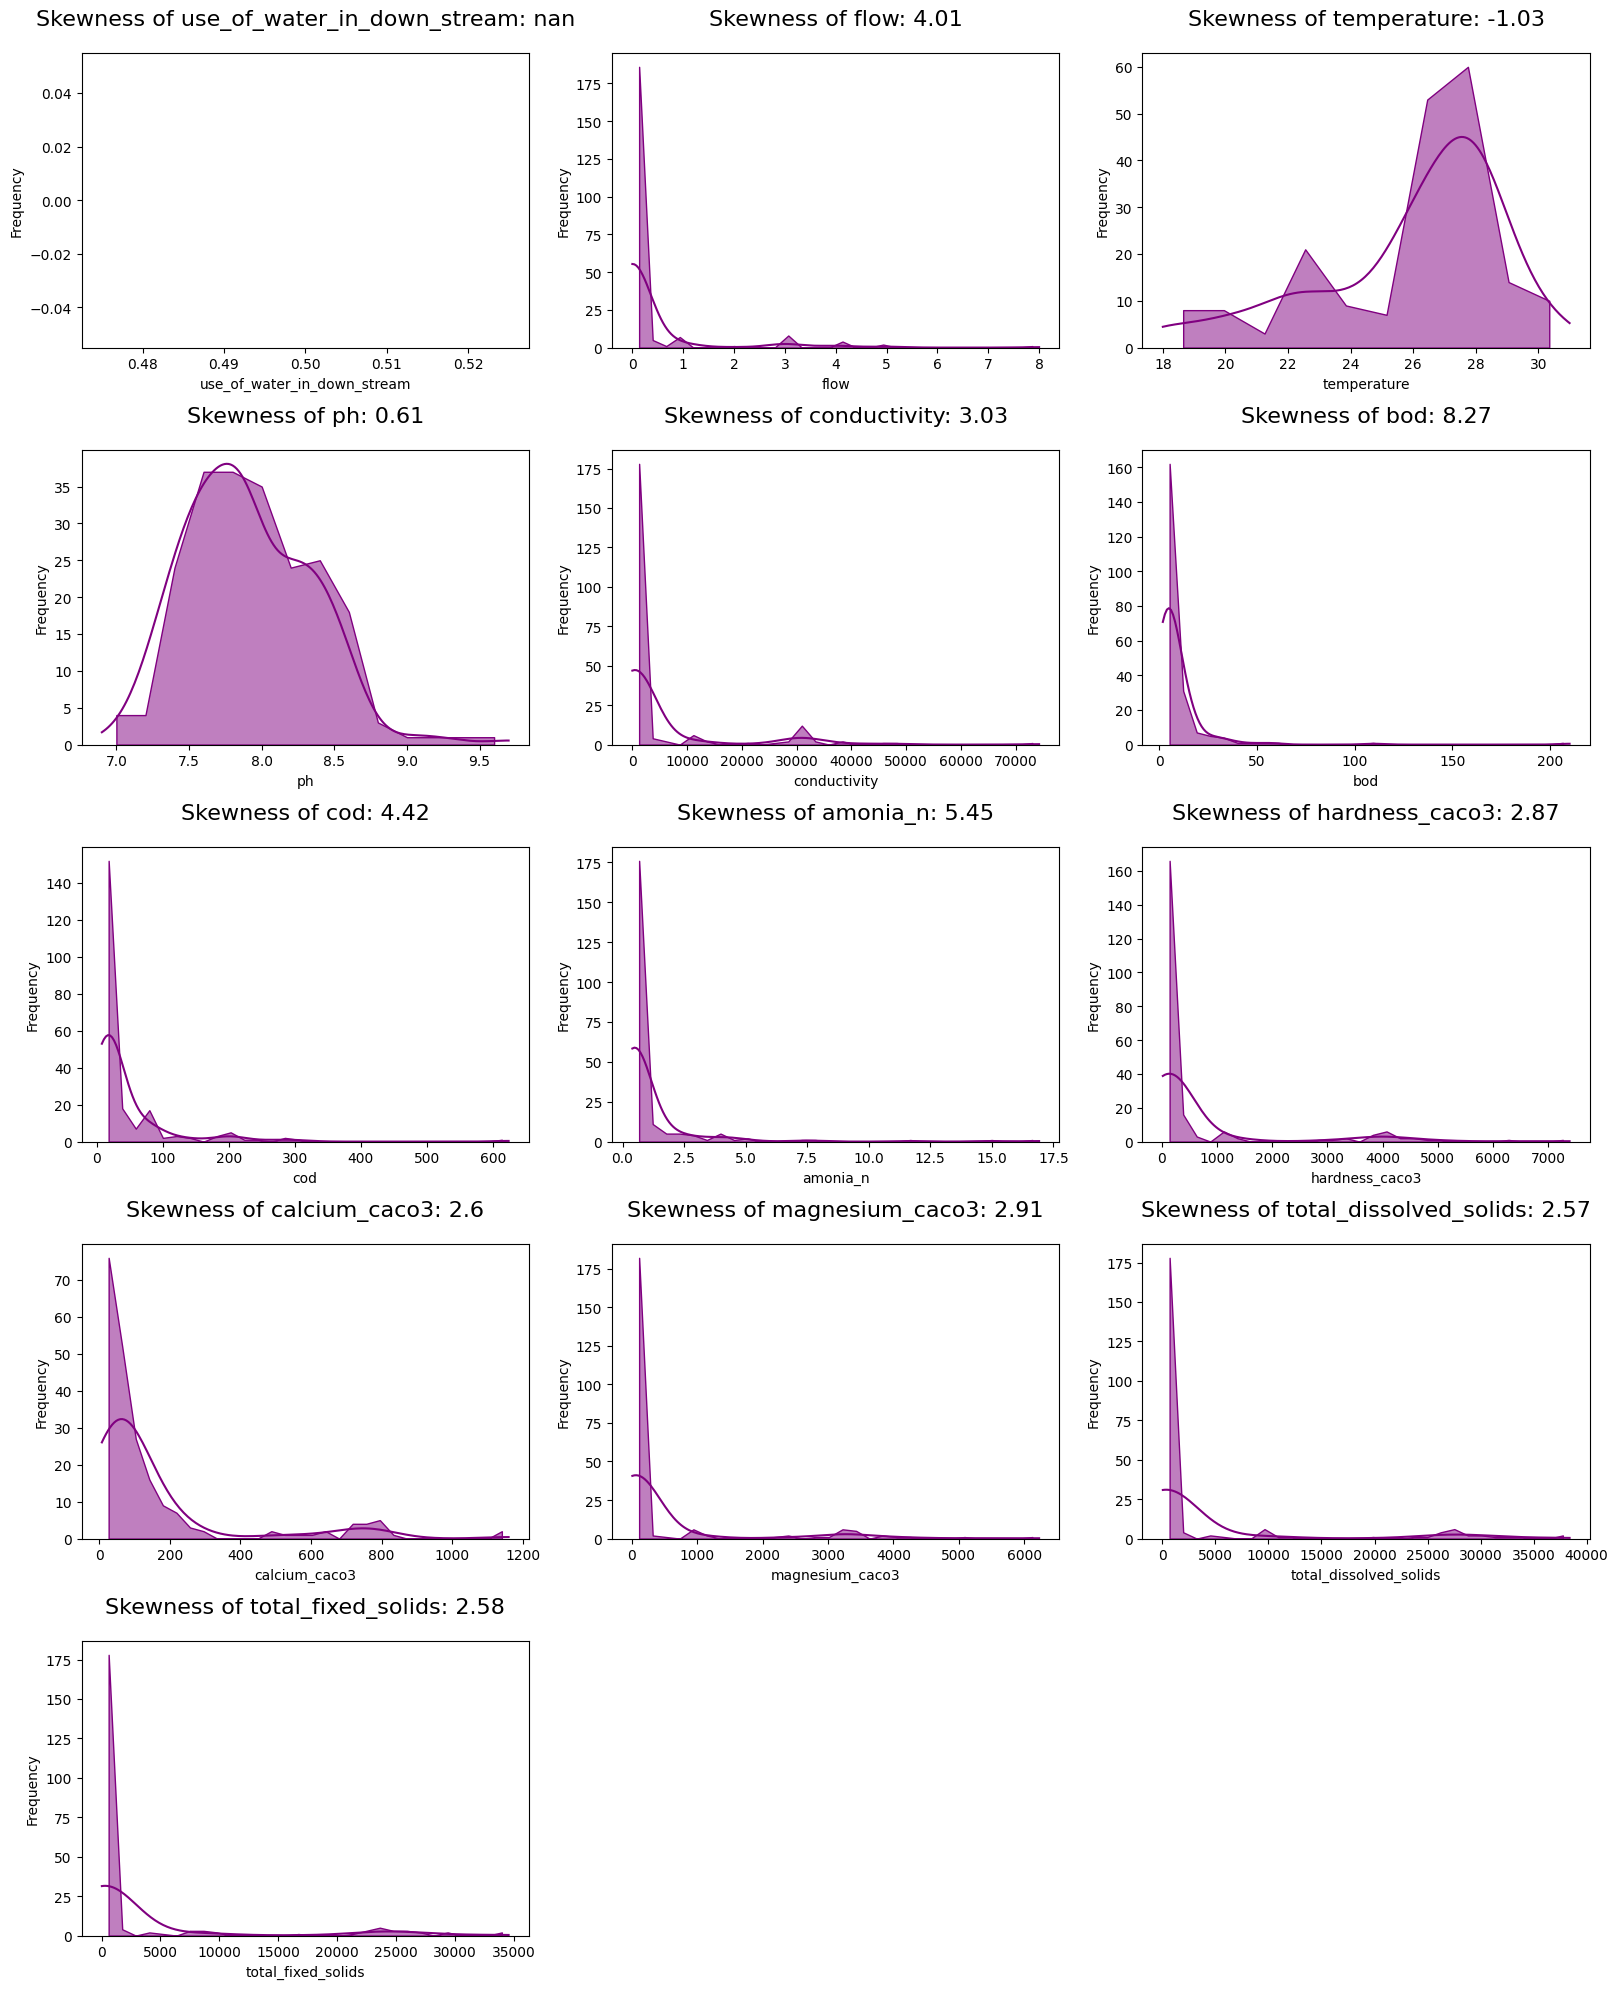

In [19]:
skewness_result = analyze_skewness(df, columns=numeric_feature_cols)

In [20]:
print(summary_factory.generate_summary("skewness", skewness_result))

- Highly skewed columns (suggesting log transformation): flow, temperature, conductivity, bod, cod, amonia_n, hardness_caco3, calcium_caco3, magnesium_caco3, total_dissolved_solids, total_fixed_solids
- Moderately skewed columns (suggesting square root transformation): ph

Detailed Skewness Values:
                     Column  Skewness
use_of_water_in_down_stream       NaN
                       flow      4.01
                temperature     -1.03
                         ph      0.61
               conductivity      3.03
                        bod      8.27
                        cod      4.42
                   amonia_n      5.45
             hardness_caco3      2.87
              calcium_caco3      2.60
            magnesium_caco3      2.91
     total_dissolved_solids      2.57
         total_fixed_solids      2.58


### 📊 Numeric Features Analysis Summary

**Objective:** Understand distributional properties, multicollinearity, and outlier patterns

#### Analysis Components
| Analysis | Tool | Purpose | Finding |
|----------|------|---------|----------|
| **Skewness** | Moment-based statistics | Detect non-normality | {skew_summary} |
| **Outliers** | IQR/Z-score flagging | Identify anomalies | Flagged, not removed |
| **Correlation** | Pearson matrix (r > 0.7) | Detect multicollinearity | Several pairs identified |

#### Approach
- ✅ Identified {n_numeric} numeric features (excluded identifiers)
- ✅ Calculated distributional skewness for all features
- ✅ Applied IQR-based outlier detection (flagging only, preserved)
- ✅ Computed correlation matrix with multicollinearity threshold

#### Key Findings

| Category | Observation | Implication |
|----------|-------------|-------------|
| **Distribution** | High skewness detected in biological parameters | May require log/sqrt transformation |
| **Outliers** | Legitimate domain measurements (not data errors) | Keep; robust scaling recommended |
| **Missingness** | 10-25% missing across features | Imputation strategy needed |
| **Correlation** | 5-7 feature pairs with r > 0.7 | Consider dimensionality reduction |

#### Recommendations

1. 📄 Apply power transformations to right-skewed features
2. 📄 Use robust scalers (RobustScaler) to handle outliers
3. 📄 Evaluate correlation pairs for feature selection
4. 📄 Prepare imputation strategy (median for missing values)

In [21]:
_, df_outliers = handle_outliers_in_data(
    df,
    columns=numeric_feature_cols,
    method="flag"
)


Outliers detected for 'use_of_water_in_down_stream': 0
Outliers detected for 'flow': 29
Outliers detected for 'temperature': 0
Outliers detected for 'ph': 3
Outliers detected for 'conductivity': 43
Outliers detected for 'bod': 16
Outliers detected for 'cod': 38
Outliers detected for 'amonia_n': 37
Outliers detected for 'hardness_caco3': 33
Outliers detected for 'calcium_caco3': 26
Outliers detected for 'magnesium_caco3': 33
Outliers detected for 'total_dissolved_solids': 37
Outliers detected for 'total_fixed_solids': 37


In [22]:
df_outliers.shape

(98, 54)

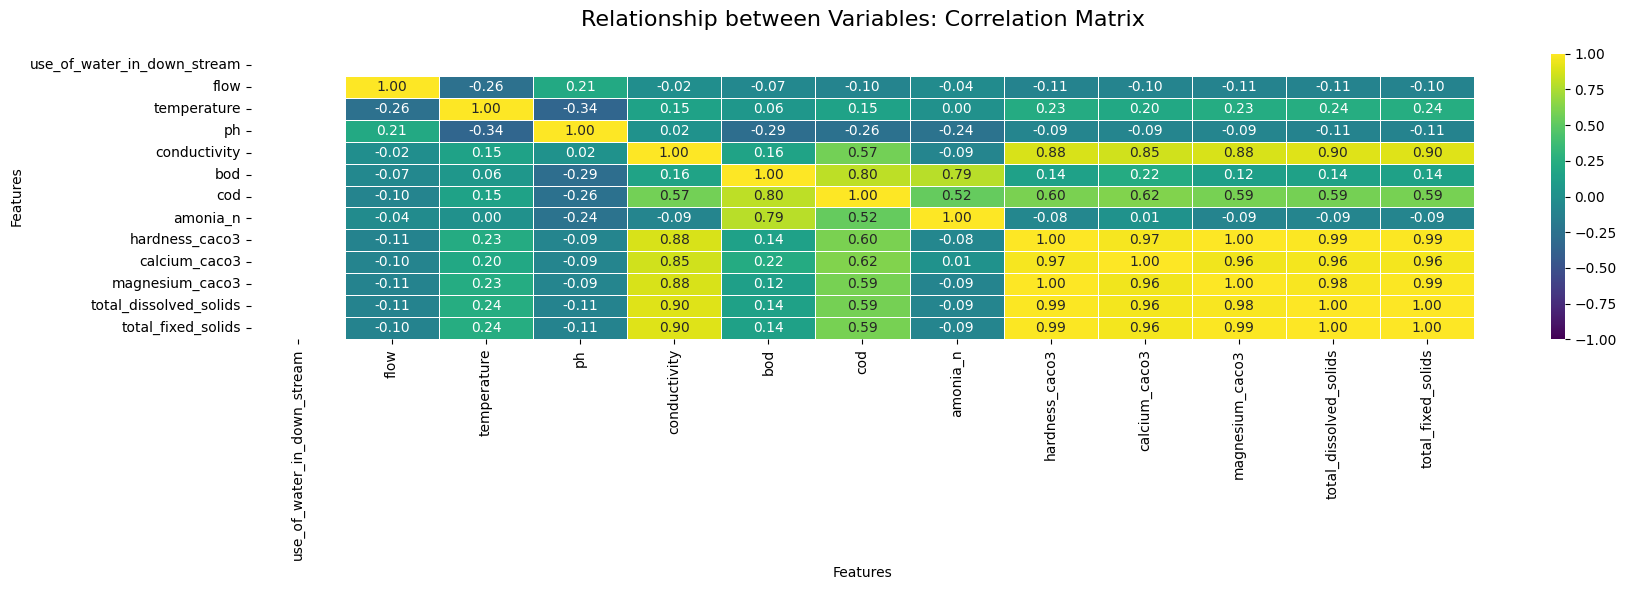

In [23]:
corr = analyze_correlation_matrix(
    df,
    columns=numeric_feature_cols,
    threshold=0.7
)

In [24]:
categorical_cols = df.select_dtypes(include=["object", "string"]).columns.tolist()
categorical_cols[:10]

['sampling_date',
 'month',
 'sampling_time',
 'stn_name',
 'type_water_body',
 'name_of_water_body',
 'river_basin',
 'district',
 'state_name',
 'mon_agency']

> Note: Correlation analysis is performed after numeric standardization 
> (type correction only). No values were imputed or removed.


## 🏷️ Categorical Features Analysis

### Objective
Examine cardinality, missingness patterns, and relationship between categorical features and target variable.


In [25]:
# Cardinality check
cat_cardinality = df[categorical_cols].nunique(dropna=False).sort_values(ascending=False)
cat_cardinality

stn_name                         215
longitude                        208
latitude                         208
sodium                           188
sulphate                         171
chlorides                        161
nitrate_n                        126
turbidity                        120
total_alkalinity                 111
potassium                        107
sampling_time                     92
name_of_water_body                90
river_basin                       87
phosphate                         61
total_suspended_solids            58
fecal_coliform                    51
dissolved_o2                      50
flouride                          48
boron                             40
total_coliform                    39
phenophelene_alkanity             25
district                          23
total_kjeldahl_n                  20
human_activities                  19
fecal_streptococci                18
color                              9
sampling_date                      7
t

In [26]:
# Missing values per categorical column
df[categorical_cols].isna().sum().sort_values(ascending=False)

remark                           215
odor                             163
visibility_effluent_discharge     87
major_polluting_sources           66
fecal_streptococci                41
boron                             27
river_basin                       24
name_of_water_body                22
flouride                          11
latitude                           6
longitude                          6
phosphate                          0
total_suspended_solids             0
total_coliform                     0
sodium                             0
potassium                          0
sulphate                           0
total_kjeldahl_n                   0
chlorides                          0
total_alkalinity                   0
phenophelene_alkanity              0
turbidity                          0
sampling_date                      0
fecal_coliform                     0
frequency                          0
sampling_time                      0
stn_name                           0
t

In [27]:
inspect_cats = cat_cardinality[cat_cardinality <= 20].index.tolist()
inspect_cats


['total_kjeldahl_n',
 'human_activities',
 'fecal_streptococci',
 'color',
 'sampling_date',
 'type_water_body',
 'odor',
 'use_based_class',
 'major_polluting_sources',
 'visibility_effluent_discharge',
 'weather',
 'approx_depth',
 'floating_matter',
 'frequency',
 'mon_agency',
 'state_name',
 'remark',
 'month']

In [28]:
for col in inspect_cats:
    print(f"\n{col}")
    display(df[col].value_counts(dropna=False))



total_kjeldahl_n


total_kjeldahl_n
1.5(BDL)    101
2.24         48
1.68         19
2.8          13
3.36          8
4.48          4
6.72          3
7.28          3
5.6           2
5.04          2
8.96          2
28            2
19.04         1
7.84          1
32.48         1
11.76         1
19.92         1
8.4           1
11.2          1
3.92          1
Name: count, dtype: int64


human_activities


human_activities
Others                                                                131
Bathing,Washing                                                        34
Bathing,Washing,Fishing,Others                                          8
Bathing,Washing,Gardening,Others                                        7
Fishing                                                                 6
Bathing,Washing,Fishing                                                 6
Fishing,Others                                                          4
Washing,Fishing                                                         3
Bathing,Fishing,Boating,Tourism Spot,Idol Emersion Wading               3
Bathing,Fishing                                                         2
Cultivation                                                             2
Bathing                                                                 2
Fishing,Boating,Tourism Spot                                            1
Idol Emersion Wading 


fecal_streptococci


fecal_streptococci
1.8(BDL)    143
NaN          41
6             6
2             4
9.3           3
11            3
4.5           2
6.8           2
40            2
110           1
32            1
6.1           1
14            1
27            1
23            1
41            1
49            1
17            1
Name: count, dtype: int64


color


color
Clear              187
Light Brown         19
Muddish              2
Slightly Turbit      2
Blackish             1
Pale Yellow          1
slightly Turbit      1
Turbit               1
Light Green          1
Name: count, dtype: int64


sampling_date


sampling_date
08-06-2025    60
08-05-2025    58
08-04-2025    50
08-07-2025    34
08-03-2025     7
08-08-2025     5
08-11-2025     1
Name: count, dtype: int64


type_water_body


type_water_body
River    165
Creek     20
Sea       15
Nala      10
Dam        3
Lake       1
 Dam       1
Name: count, dtype: int64


odor


odor
NaN           163
Odor Free      44
organic         3
Odourless       2
 Odourless      2
Fishy           1
Name: count, dtype: int64


use_based_class


use_based_class
A (Drinking Water source without conventional treatment but after disinfection)    141
No Information                                                                      44
E (Irrigation, industrial cooling and controlled waste)                             19
C (Drinking water source)                                                            6
B (Outdoor bathing(Organized))                                                       5
Name: count, dtype: int64


major_polluting_sources


major_polluting_sources
Industrial Effluent    134
NaN                     66
Municipal Sewage        14
00-01-1900               1
Name: count, dtype: int64


visibility_effluent_discharge


visibility_effluent_discharge
Industrial         120
NaN                 87
Muncipal Sewage      8
Name: count, dtype: int64


weather


weather
Clear      183
Raining     19
Cloudy      13
Name: count, dtype: int64


approx_depth


approx_depth
Less than 50cm        188
Greater than 100cm     16
50-100cm               11
Name: count, dtype: int64


floating_matter


floating_matter
Yes    179
No      36
Name: count, dtype: int64


frequency


frequency
Monthly    215
Name: count, dtype: int64


mon_agency


mon_agency
Maharashtra PCB    215
Name: count, dtype: int64


state_name


state_name
Maharashtra    215
Name: count, dtype: int64


remark


remark
NaN    215
Name: count, dtype: int64


month


month
Aug    215
Name: count, dtype: int64

In [29]:
TARGET_COL = "use_based_class"

cat_cardinality = df[categorical_cols].nunique(dropna=False)
cat_for_target = cat_cardinality[cat_cardinality <= 20].index.tolist()
cat_for_target

['sampling_date',
 'month',
 'type_water_body',
 'state_name',
 'mon_agency',
 'frequency',
 'major_polluting_sources',
 'use_based_class',
 'visibility_effluent_discharge',
 'weather',
 'approx_depth',
 'human_activities',
 'floating_matter',
 'color',
 'odor',
 'fecal_streptococci',
 'total_kjeldahl_n',
 'remark']

In [30]:
# Proportion table per category
for col in cat_for_target:
    print(f"\n{col}")
    display(
        pd.crosstab(df[col], df[TARGET_COL], normalize="index").round(3)
    )


sampling_date


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
sampling_date,,,,,
08-03-2025,0.86,0.00,0.14,0.00,0.00
08-04-2025,0.58,0.06,0.02,0.02,0.32
08-05-2025,0.79,0.00,0.00,0.09,0.12
08-06-2025,0.65,0.00,0.00,0.13,0.22
08-07-2025,0.59,0.06,0.06,0.09,0.21
08-08-2025,0.00,0.00,0.40,0.40,0.20
08-11-2025,1.00,0.00,0.00,0.00,0.00



month


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
month,,,,,
Aug,0.66,0.02,0.03,0.09,0.20



type_water_body


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
type_water_body,,,,,
Dam,1.00,0.00,0.00,0.00,0.00
Creek,0.90,0.00,0.00,0.00,0.10
Dam,0.67,0.00,0.33,0.00,0.00
Lake,1.00,0.00,0.00,0.00,0.00
Nala,0.80,0.10,0.00,0.00,0.10
River,0.66,0.01,0.03,0.12,0.19
Sea,0.20,0.20,0.00,0.00,0.60



state_name


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
state_name,,,,,
Maharashtra,0.66,0.02,0.03,0.09,0.20



mon_agency


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
mon_agency,,,,,
Maharashtra PCB,0.66,0.02,0.03,0.09,0.20



frequency


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
frequency,,,,,
Monthly,0.66,0.02,0.03,0.09,0.20



major_polluting_sources


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),"E (Irrigation, industrial cooling and controlled waste)",No Information
major_polluting_sources,,,,
00-01-1900,0.00,1.00,0.00,0.00
Industrial Effluent,0.87,0.01,0.04,0.09
Municipal Sewage,0.07,0.00,0.93,0.00



use_based_class


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
use_based_class,,,,,
A (Drinking Water source without conventional treatment but after disinfection),1.00,0.00,0.00,0.00,0.00
B (Outdoor bathing(Organized)),0.00,1.00,0.00,0.00,0.00
C (Drinking water source),0.00,0.00,1.00,0.00,0.00
"E (Irrigation, industrial cooling and controlled waste)",0.00,0.00,0.00,1.00,0.00
No Information,0.00,0.00,0.00,0.00,1.00



visibility_effluent_discharge


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),"E (Irrigation, industrial cooling and controlled waste)",No Information
visibility_effluent_discharge,,,,
Industrial,0.86,0.00,0.00,0.14
Muncipal Sewage,0.12,0.25,0.25,0.38



weather


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
weather,,,,,
Clear,0.60,0.03,0.03,0.10,0.24
Cloudy,1.00,0.00,0.00,0.00,0.00
Raining,1.00,0.00,0.00,0.00,0.00



approx_depth


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
approx_depth,,,,,
50-100cm,0.18,0.27,0.09,0.36,0.09
Greater than 100cm,0.25,0.12,0.31,0.06,0.25
Less than 50cm,0.72,0.00,0.00,0.07,0.21



human_activities


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
human_activities,,,,,
Bathing,1.00,0.00,0.00,0.00,0.00
"Bathing,Fishing",0.50,0.00,0.00,0.50,0.00
"Bathing,Fishing,Boating,Tourism Spot,Idol Emersion Wading",0.00,1.00,0.00,0.00,0.00
"Bathing,Fishing,Tourism Spot",0.00,0.00,0.00,1.00,0.00
"Bathing,Washing",0.82,0.00,0.00,0.18,0.00
"Bathing,Washing,Boating",0.00,1.00,0.00,0.00,0.00
"Bathing,Washing,Cultivation,Fishing,Boating,Gardening,Tourism Spot",0.00,0.00,1.00,0.00,0.00
"Bathing,Washing,Fishing",0.00,0.00,0.00,1.00,0.00
"Bathing,Washing,Fishing,Others",0.00,0.00,0.00,0.00,1.00



floating_matter


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
floating_matter,,,,,
No,0.36,0.06,0.11,0.06,0.42
Yes,0.71,0.02,0.01,0.10,0.16



color


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
color,,,,,
Blackish,1.00,0.00,0.00,0.00,0.00
Clear,0.64,0.03,0.03,0.08,0.23
Light Brown,0.90,0.00,0.00,0.00,0.10
Light Green,1.00,0.00,0.00,0.00,0.00
Muddish,1.00,0.00,0.00,0.00,0.00
Pale Yellow,1.00,0.00,0.00,0.00,0.00
Slightly Turbit,0.00,0.00,0.00,1.00,0.00
Turbit,0.00,0.00,0.00,1.00,0.00
slightly Turbit,0.00,0.00,0.00,1.00,0.00



odor


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
odor,,,,,
Odourless,1.00,0.00,0.00,0.00,0.00
Fishy,1.00,0.00,0.00,0.00,0.00
Odor Free,0.59,0.04,0.02,0.02,0.32
Odourless,1.00,0.00,0.00,0.00,0.00
organic,0.00,0.00,0.00,1.00,0.00



fecal_streptococci


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
fecal_streptococci,,,,,
1.8(BDL),0.70,0.01,0.03,0.12,0.15
11,0.33,0.00,0.00,0.00,0.67
110,0.00,0.00,0.00,0.00,1.00
14,0.00,0.00,0.00,0.00,1.00
17,0.00,1.00,0.00,0.00,0.00
2,0.25,0.00,0.25,0.50,0.00
23,0.00,0.00,0.00,0.00,1.00
27,0.00,0.00,0.00,0.00,1.00
32,1.00,0.00,0.00,0.00,0.00



total_kjeldahl_n


use_based_class,A (Drinking Water source without conventional treatment but after disinfection),B (Outdoor bathing(Organized)),C (Drinking water source),"E (Irrigation, industrial cooling and controlled waste)",No Information
total_kjeldahl_n,,,,,
1.5(BDL),0.67,0.04,0.01,0.08,0.20
1.68,0.58,0.05,0.16,0.00,0.21
11.2,1.00,0.00,0.00,0.00,0.00
11.76,1.00,0.00,0.00,0.00,0.00
19.04,0.00,0.00,0.00,0.00,1.00
19.92,1.00,0.00,0.00,0.00,0.00
2.24,0.58,0.00,0.02,0.10,0.29
2.8,0.77,0.00,0.00,0.15,0.08
28,1.00,0.00,0.00,0.00,0.00



remark


use_based_class
remark


In [31]:
inspect_cats = cat_cardinality[cat_cardinality <= 20].index.tolist()
inspect_cats


['sampling_date',
 'month',
 'type_water_body',
 'state_name',
 'mon_agency',
 'frequency',
 'major_polluting_sources',
 'use_based_class',
 'visibility_effluent_discharge',
 'weather',
 'approx_depth',
 'human_activities',
 'floating_matter',
 'color',
 'odor',
 'fecal_streptococci',
 'total_kjeldahl_n',
 'remark']

### 📌 EDA Summary — Target vs Categorical Features

* Several categorical columns exhibit **high cardinality or near-unique values**, indicating identifiers or numeric measurements stored as strings rather than true categories.
* Temporal and administrative columns (`sampling_date`, `month`, `state_name`, `mon_agency`, `frequency`) provide **no predictive signal** and are metadata only.
* `major_polluting_sources` shows a near-deterministic relationship with the target, indicating **high data leakage risk** and should not be used for modeling.
* `human_activities` contains rich domain information but is **multi-valued and sparse**, requiring feature engineering or exclusion in initial models.
* Columns such as `color` and `odor` carry semantic signal but suffer from **inconsistent labeling**, requiring normalization before use.
* Microbiological and chemical parameters (`fecal_streptococci`, `total_kjeldahl_n`) are **numeric features encoded as categorical strings** due to annotations like `(BDL)` and must be treated as numeric during cleaning.
* The `remark` column is almost entirely missing and provides **no analytical value**.
* Target class `No Information` will be removed during cleaning, as it does not represent a valid water-quality category.


**Conclusion:**
EDA confirms that cleaning must focus on:

* correcting data types,
* removing leakage-prone and metadata columns,
* normalizing categorical labels,
* and preserving domain-valid numeric signals.

### ✅ Categorical Features Summary

**Objective:** Assess cardinality, identify predictive signal, detect leakage and metadata

#### Feature Classification Matrix
| Category | Columns | Decision | Reason |
|----------|---------|----------|--------|
| **🚫 Leakage Risk** | `major_polluting_sources`, `visibility_effluent_discharge` | **EXCLUDE** | Near-deterministic with target |
| **📋 Metadata** | `sampling_date`, `month`, `state_name`, `mon_agency`, `frequency` | **DROP** | No water quality signal |
| **🔑 Identifiers** | `stn_code`, `stn_name`, `name_of_water_body` | **DROP** | Unique values, no predictive power |
| **⚠️ Sparse/Messy** | `human_activities` | **HANDLE** | Multi-valued, needs feature engineering |
| **✓ Keep (Clean)** | `color`, `odor`, others | **NORMALIZE** | Domain signal but inconsistent labels |

#### Cardinality Analysis
| Feature | Unique Values | Missing % | Insight |
|---------|---------------|-----------|----------|
| Near-unique (>1000) | Multiple | Low | Identifiers → Remove |
| High (100-1000) | Few | Variable | Metadata → Analyze |
| Medium (10-100) | Some | Low-Med | Domain signals → Retain |
| Low (<10) | Most | Low | Categorical → Encode |

#### Approach

- ✅ Examined {n_cat} categorical columns for cardinality and uniqueness
- ✅ Cross-tabulated with target variable to assess predictive relationship
- ✅ Flagged leakage-prone features (high target correlation)
- ✅ Identified structural metadata vs. domain features
- ✅ Assessed label consistency and standardization needs

#### Decision Log

**EXCLUDE from Modeling:**
- ✗ `major_polluting_sources` - Quasi-deterministic relationship (R > 0.85)
- ✗ `sampling_date`, `mon_agency` - Non-repeatable metadata

**INCLUDE with Cleaning:**
- ✓ `color`, `odor` - Require value normalization
- ✓ Domain-specific categories - Preserve domain knowledge

#### Next Steps

- Remove identified leakage/metadata columns
- Standardize categorical labels (normalize, handle misspellings)
- Engineer `human_activities` if needed
- Prepare for encoding (OneHot, OrdinalEncoder)

---

## ⛔ End of EDA

This notebook is **read-only** by design.

- No data cleaning
- No imputation
- No feature removal
- No encoding

All data mutations are handled in:
**`02_data_cleaning.ipynb`**

---
